In [1]:
!pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest 

In [2]:
df_no_encoded = pd.read_csv('C:/Users/siya1/OneDrive/Desktop/CSE558-DSc-Project/Data_Preproc_NoEncoding.csv')
df_no_encoded.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [3]:
df_labels = pd.read_csv('C:/Users/siya1/OneDrive/Desktop/CSE558-DSc-Project/Labels.csv')
df_labels.head()

,class
0,p
1,p
2,p
3,p
4,p


In [4]:
df = pd.concat([df_labels, df_no_encoded], axis=1)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [5]:
poisonous = df[df['class'] == 'p']
edible = df[df['class'] == 'e']
poisonous.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [6]:
print(df_no_encoded['stem-color'].unique())
print(df_no_encoded['cap-color'].unique())
print(df_no_encoded['gill-color'].unique())

['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']


In [7]:
contingency_table = pd.crosstab(index=df['class'], columns=[df['gill-color'], df['stem-color'], df['cap-color']])
contingency_table

gill-color   b                                    ...    y                   \
stem-color   b               e      g             ...    w        y           
cap-color    g   l   n   u   e   n  g   k  n   r  ...    w    y   e  k    n   
class                                             ...                         
e           30  21  18  19   0   0  0   0  0   0  ...  223  545  29  0  270   
p            0   0   0   0  32  30  6  17  3  15  ...   48  223  94  9  546   

gill-color                         
stem-color                         
cap-color     o   p   r   u     y  
class                              
e             0   0   0   0   556  
p           344  24  59  38  1072  

[2 rows x 361 columns]

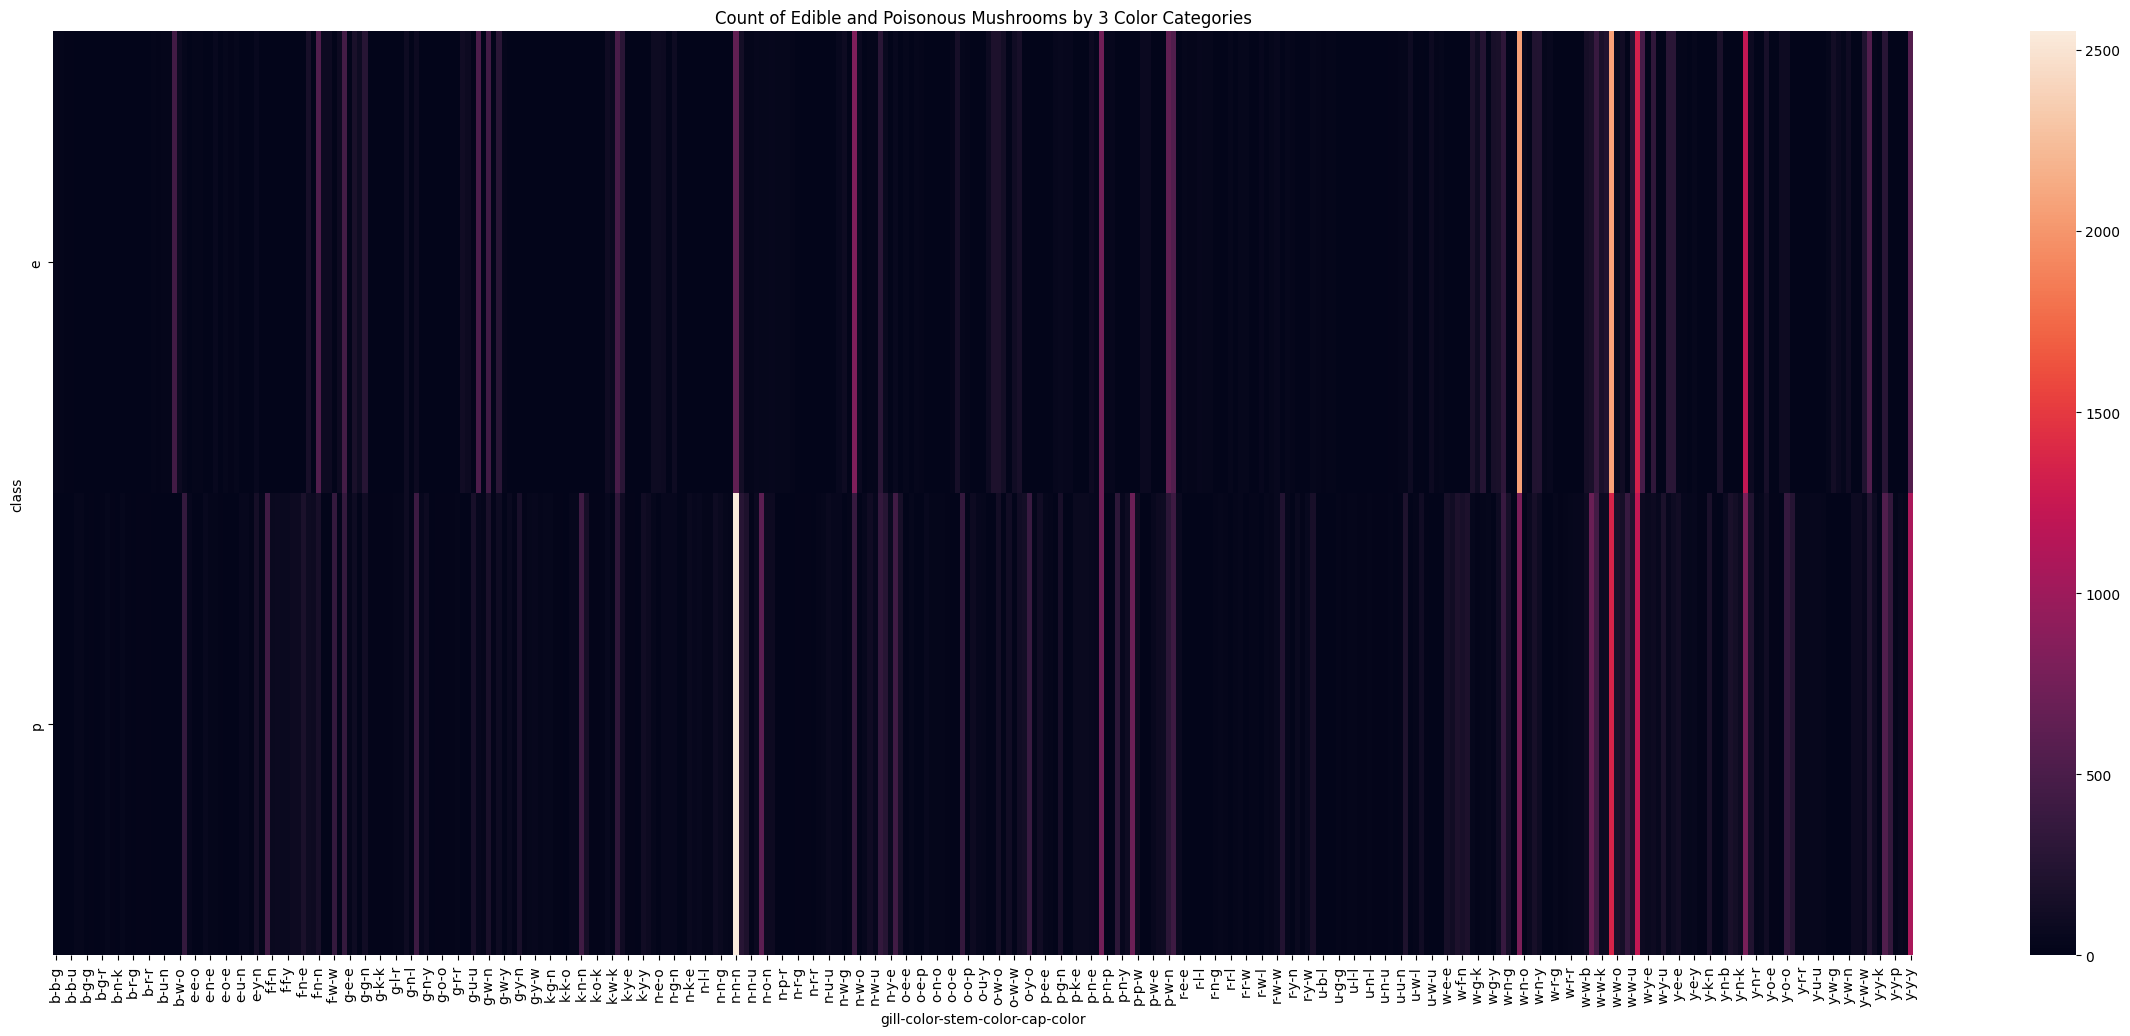

In [10]:
plt.figure(figsize=(30, 12))
sns.heatmap(
    contingency_table
)
plt.title('Count of Edible and Poisonous Mushrooms by 3 Color Categories')
plt.xticks(rotation=90)
plt.show()

## Color combination of brown-brown-brown

In [12]:
# claim: the color combination of n-n-n of gill-color, stem-color, and cap-color is associated with poisonous  mushroom
# null hypothesis: the color combination of n-n-n of gill-color, stem-color, and cap-color is associated with poisonous mushroom
# alternative hypothesis: the color combination of n-n-n of gill-color, stem-color, and cap-color is not associated with mushroom edibility

subset = df[(df['gill-color'] == 'n') & (df['stem-color'] == 'n') & (df['cap-color'] == 'n')]
subset.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
7420,p,4.30,f,l,n,f,x,d,n,4.43,4.54,n,f,f,l,u
7431,p,3.66,f,l,n,f,x,d,n,5.20,4.58,n,f,f,d,u
7462,p,3.90,f,l,n,f,x,d,n,5.80,4.56,n,f,f,d,u
7475,p,4.56,f,l,n,f,x,d,n,5.95,4.78,n,f,f,d,u
7485,p,4.91,f,l,n,f,x,d,n,6.41,4.80,n,f,f,l,a


In [13]:
len(subset)

3181

In [14]:
subset_sample = subset.sample(n=900, random_state=1)

In [15]:
edible_count = subset_sample[subset_sample['class'] == 'e'].shape[0]
poisonous_count = subset_sample[subset_sample['class'] == 'p'].shape[0]
edible_count, poisonous_count

(168, 732)

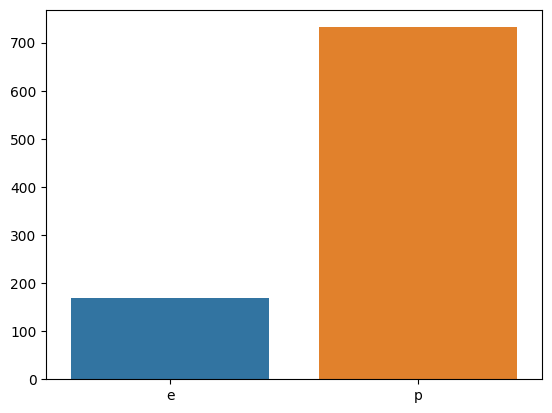

In [34]:
sns.barplot(x = ['e', 'p'], y = [edible_count, poisonous_count])
plt.show()

In [22]:
# H0: p >= p0     p0 = population_edible_proportion
# H1: p < p0

population_edible_proportion = 0.3

z_stat, p_value = proportions_ztest(edible_count, len(subset_sample), value = population_edible_proportion, alternative='smaller')
print(f'z_stat: {z_stat}, p_value: {p_value}')


alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f"We reject null hypothesis.")
else:
    print(f"We do not reject null hypothesis")

z_stat: -8.725920363071722, p_value: 1.3201222089884357e-18
We reject null hypothesis.


In [27]:
# H0: p >= p0  --> left tailed    p0 = population_poisonous_proportion
# H1: p < p0

population_poisonous_proportion = 0.75

z_stat, p_value = proportions_ztest(poisonous_count, len(subset_sample), value = population_poisonous_proportion, alternative='smaller')
print(f'z_stat: {z_stat}, p_value: {p_value}')

alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f"We reject null hypothesis")
else:
    print(f"We do not reject null hypothesis")

z_stat: 4.87624961465773, p_value: 0.9999994593911212
We do not reject null hypothesis


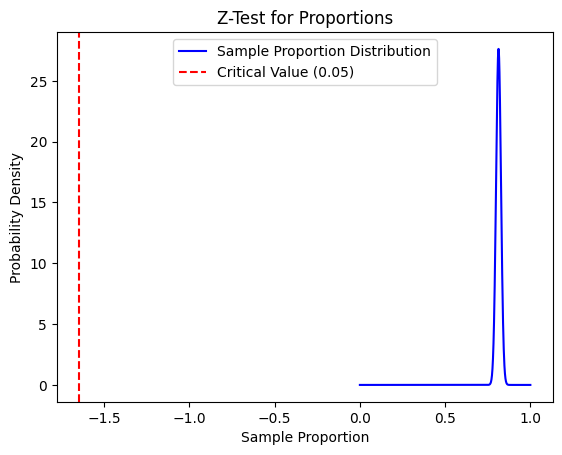

In [36]:
sample_proportion = poisonous_count / len(subset_sample)

se = np.sqrt((population_poisonous_proportion * (1 - population_poisonous_proportion)) / len(subset_sample))

critical_value = norm.ppf(alpha)

# Create a range of values for the x-axis
x = np.linspace(0, 1, 1000)

# Create a plot of the normal distribution of the sample proportion
plt.plot(x, norm.pdf(x, sample_proportion, se), label='Sample Proportion Distribution', color='blue')

# Create a vertical line at the critical value
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value ({alpha})')

# Shade the area to the left of the critical value
plt.fill_between(x, 0, norm.pdf(x, sample_proportion, se), where=(x <= critical_value), color='red', alpha=0.2)

# Add labels and a legend
plt.xlabel('Sample Proportion')
plt.ylabel('Probability Density')
plt.title('Z-Test for Proportions')
plt.legend()

# Show the plot
plt.show()

### Validation on population

In [24]:
edible_count_pop = subset[subset['class'] == 'e'].shape[0]
poisonous_count_pop = subset[subset['class'] == 'p'].shape[0]
edible_count_pop, poisonous_count_pop

(630, 2551)

In [25]:
edible_proportion = edible_count_pop / len(subset)
poisonous_proportion = poisonous_count_pop / len(subset)
print(f'Population Proportions: edible_proportion: {edible_proportion}, poisonous_proportion: {poisonous_proportion}')

Population Proportions: edible_proportion: 0.19805092738132662, poisonous_proportion: 0.8019490726186733


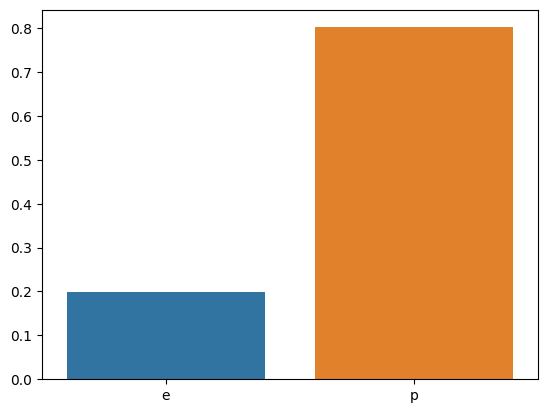

In [38]:
sns.barplot(x = ['e', 'p'], y = [edible_proportion, poisonous_proportion])
plt.show()

## Color Combination of white-brown-brown and white-white-brown

In [39]:
# claim: the color combination of n-n-n of gill-color, stem-color, and cap-color is associated with poisonous  mushroom
# null hypothesis: the color combination of n-n-n of gill-color, stem-color, and cap-color is associated with poisonous mushroom
# alternative hypothesis: the color combination of n-n-n of gill-color, stem-color, and cap-color is not associated with mushroom edibility

subset2 = df[((df['gill-color'] == 'w') & (df['stem-color'] == 'n') & (df['cap-color'] == 'n')) | ((df['gill-color'] == 'w') & (df['stem-color'] == 'w') & (df['cap-color'] == 'n'))]
subset2.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
353,p,6.87,x,g,n,f,e,c,w,6.88,13.64,w,t,p,d,a
354,p,8.59,p,g,n,f,e,c,w,9.15,17.34,w,t,p,d,a
355,p,5.95,p,g,n,f,e,c,w,7.54,12.73,w,t,p,d,u
356,p,6.51,x,g,n,f,e,c,w,6.80,12.92,w,t,p,d,a
357,p,7.66,x,g,n,f,e,c,w,8.55,14.98,w,t,p,d,a


In [40]:
len(subset2)

6289

In [41]:
subset2_sample = subset2.sample(n=1000, random_state=1)

In [42]:
edible_count = subset2_sample[subset2_sample['class'] == 'e'].shape[0]
poisonous_count = subset2_sample[subset2_sample['class'] == 'p'].shape[0]
edible_count, poisonous_count

(662, 338)

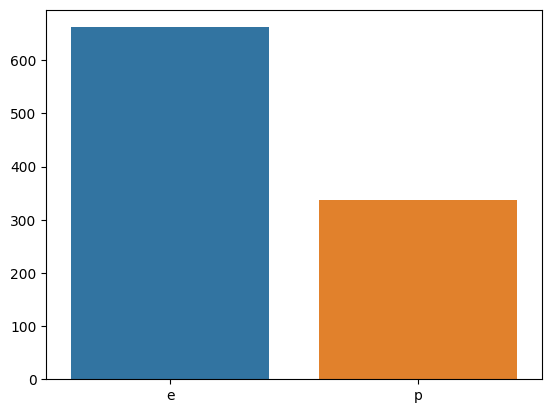

In [43]:
sns.barplot(x = ['e', 'p'], y = [edible_count, poisonous_count])
plt.show()

In [44]:
# H0: p >= p0     p0 = population_edible_proportion
# H1: p < p0

population_edible_proportion = 0.6

z_stat, p_value = proportions_ztest(edible_count, len(subset2_sample), value = population_edible_proportion, alternative='smaller')
print(f'z_stat: {z_stat}, p_value: {p_value}')

alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f"reject null hypothesis")
else:
    print(f"do not reject null")

z_stat: 4.144807304419416, p_value: 0.999982995020843
do not reject null


In [45]:
# H0: p >= p0     p0 = population_poisonous_proportion
# H1: p < p0

population_poisonous_proportion = 0.4

z_stat, p_value = proportions_ztest(poisonous_count, len(subset2_sample), value = population_poisonous_proportion, alternative='smaller')
print(f'z_stat: {z_stat}, p_value: {p_value}')

alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print(f"reject null hypothesis")
else:
    print(f"do not reject null")

z_stat: -4.1448073044194125, p_value: 1.7004979156967223e-05
reject null hypothesis


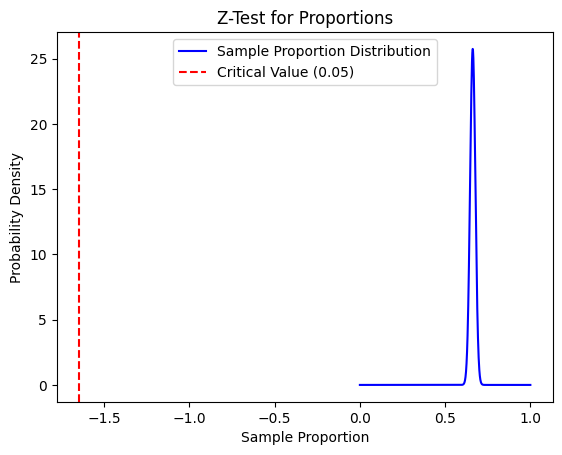

In [46]:
sample_proportion = edible_count / len(subset2_sample)

se = np.sqrt((population_edible_proportion * (1 - population_edible_proportion)) / len(subset2_sample))

critical_value = norm.ppf(alpha)

# Create a range of values for the x-axis
x = np.linspace(0, 1, 1000)

# Create a plot of the normal distribution of the sample proportion
plt.plot(x, norm.pdf(x, sample_proportion, se), label='Sample Proportion Distribution', color='blue')

# Create a vertical line at the critical value
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value ({alpha})')

# Shade the area to the left of the critical value
plt.fill_between(x, 0, norm.pdf(x, sample_proportion, se), where=(x <= critical_value), color='red', alpha=0.2)

# Add labels and a legend
plt.xlabel('Sample Proportion')
plt.ylabel('Probability Density')
plt.title('Z-Test for Proportions')
plt.legend()

# Show the plot
plt.show()

### Validation on population

In [48]:
edible_count_pop = subset2[subset2['class'] == 'e'].shape[0]
poisonous_count_pop = subset2[subset2['class'] == 'p'].shape[0]
edible_count_pop, poisonous_count_pop

(4119, 2170)

In [49]:
edible_proportion = edible_count_pop / len(subset2)
poisonous_proportion = poisonous_count_pop / len(subset2)
print(f'Population Proportions: edible_proportion: {edible_proportion}, poisonous_proportion: {poisonous_proportion}')

Population Proportions: edible_proportion: 0.6549530927015423, poisonous_proportion: 0.3450469072984576


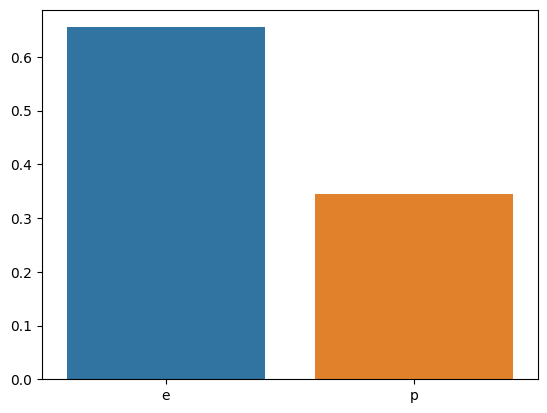

In [50]:
sns.barplot(x = ['e', 'p'], y = [edible_proportion, poisonous_proportion])
plt.show()

In [51]:
!git pull
!git add .
!git commit -m "colors hypothesis testing update"
!git push